**LOAD MODEL**

In [ ]:
!pip install tensorflow==2.12.0 keras==2.12.0 keras-bert==0.86.0

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of jax to determine which version is compatible with other requirements. This could take a while.
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 585.9/585.9 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 57.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 58.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 58.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 62.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 30.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 6.9 

In [ ]:
!pip show tensorflow
!pip show keras
!pip show keras-bert

Name: tensorflow
Version: 2.12.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: absl-py, astunparse, flatbuffers, gast, google-pasta, grpcio, h5py, jax, keras, libclang, numpy, opt-einsum, packaging, protobuf, setuptools, six, tensorboard, tensorflow-estimator, tensorflow-io-gcs-filesystem, termcolor, typing-extensions, wrapt
Required-by: dopamine_rl, tf_keras
Name: keras
Version: 2.12.0
Summary: Deep learning for humans.
Home-page: https://keras.io/
Author: Keras team
Author-email: keras-users@googlegroups.com
License: Apache 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: 
Required-by: keras-bert, tensorflow
Name: keras-bert
Version: 0.86.0
Summary: BERT implemented in Keras
Home-page: https://github.com/CyberZHG/keras-bert
Author: CyberZHG
Author-email: CyberZHG

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
path = "/content/drive/MyDrive/PBL6/Data/"

In [ ]:
from tensorflow.keras.models import load_model
from keras_bert import get_custom_objects
model = load_model(path + 'model_128_base_2e.h5', custom_objects=get_custom_objects())

/usr/local/lib/python3.10/dist-packages/keras/initializers/initializers.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


**TEST DATA**

In [ ]:
import os
import codecs
import numpy as np
import pandas as pd
import tensorflow as tf

In [ ]:
token_dict = {}
with codecs.open(path+'vocab.txt', 'rb','utf-8') as reader:
    for line in reader:
        token = line.strip()
        token_dict[token] = len(token_dict)

In [ ]:
from keras_bert import Tokenizer
tokenizer = Tokenizer(token_dict,cased=True)
SEQ_LEN = 128

In [ ]:
from sklearn.model_selection import train_test_split
def load_data(data, sentiments):
    global tokenizer
    indices = []
    for text in data:
        ids, segments = tokenizer.encode(text, max_len=SEQ_LEN)
        indices.append(ids)

    indices = np.array(indices)  # Chuyển đổi thành numpy array
    return [indices, np.zeros_like(indices)], np.array(sentiments)

In [ ]:
test = pd.read_csv(path+'DATA_test1.csv')
test = test.dropna()
data_test = test.review.tolist()
label_test = test.label.tolist()
X_test,Y_test = load_data(data_test,label_test)

In [ ]:
y_pred = np.round(model.predict(X_test))

94/94 [==============================] - 1196s 13s/step


In [ ]:
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import accuracy_score
print("Precision:", precision_score(Y_test, y_pred))
print("Recall:", recall_score(Y_test, y_pred))
print("F1 Score:", f1_score(Y_test, y_pred))
accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy:", accuracy)

Precision: 0.8764348413234301
Recall: 0.8653333333333333
F1 Score: 0.8708487084870848
Accuracy: 0.8716666666666667


In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import itertools
matplotlib.rcParams.update({'font.size': 16})
labels = [0,1]
cn = confusion_matrix(Y_test,y_pred,labels=labels)

In [ ]:
#@title plot confusion matrix
def plot_confusion_matrix(cm,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True,
                          target_names=None,
                          path_file='1.svg'):

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.savefig(path_file,format='svg')
    plt.show()

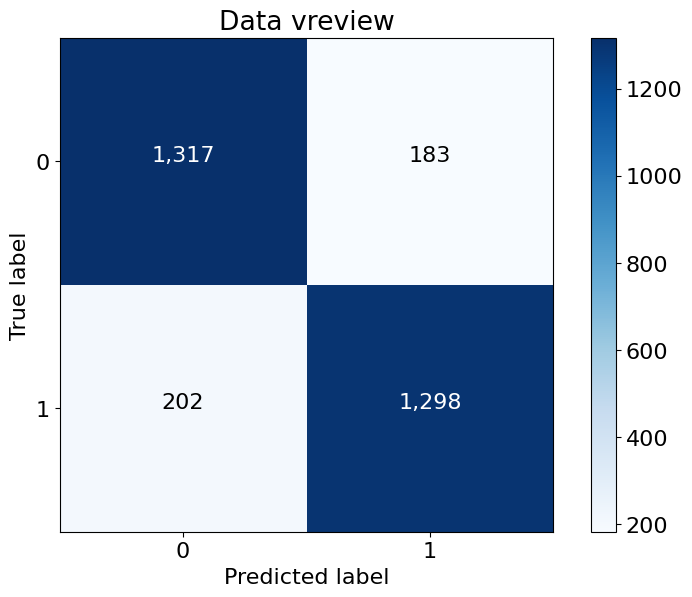

In [ ]:
plot_confusion_matrix(cn,title='Data vreview',normalize=False,target_names=labels)

**TEST SENTENCE**

In [ ]:
import os
import codecs
import numpy as np
import pandas as pd
import tensorflow as tf

In [ ]:
token_dict = {}
with codecs.open(path+'vocab.txt', 'rb','utf-8') as reader:
    for line in reader:
        token = line.strip()
        token_dict[token] = len(token_dict)

In [ ]:
from keras_bert import Tokenizer
index = Tokenizer(token_dict,cased=True)

In [ ]:
!pip3 install vncorenlp
!mkdir -p vncorenlp/models/wordsegmenter
!wget https://raw.githubusercontent.com/vncorenlp/VnCoreNLP/master/VnCoreNLP-1.1.1.jar
!wget https://raw.githubusercontent.com/vncorenlp/VnCoreNLP/master/models/wordsegmenter/vi-vocab
!wget https://raw.githubusercontent.com/vncorenlp/VnCoreNLP/master/models/wordsegmenter/wordsegmenter.rdr
!mv VnCoreNLP-1.1.1.jar vncorenlp/
!mv vi-vocab vncorenlp/models/wordsegmenter/
!mv wordsegmenter.rdr vncorenlp/models/wordsegmenter/

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 63.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for vncorenlp: filename=vncorenlp-1.0.3-py3-none-any.whl size=2645932 sha256=a09a42ca0a889a03a6b71df7292bd0190048f7654031caa823bc8eaa6f88622e
  Stored in directory: /root/.cache/pip/wheels/5d/d9/b3/41f6c6b1ab758561fd4aab55dc0480b9d7a131c6aaa573a3fa
Successfully built vncorenlp
--2024-10-19 15:57:17--  https://raw.githubusercontent.com/vncorenlp/VnCoreNLP/master/VnCoreNLP-1.1.1.jar
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 27412575 (26M) [application/octet-stream]
Saving to: ‘VnCoreNLP-1.1.1.jar’

VnCoreNLP-1.1.1.jar 100%[===================>]  26.14M  --.-KB/s    in 0.07s   

2024-10-19 15:57:18 (349 MB/s) - ‘VnCoreNLP

In [ ]:
from vncorenlp import VnCoreNLP
tokenizer = VnCoreNLP("/content/vncorenlp/VnCoreNLP-1.1.1.jar", annotators="wseg", max_heap_size='-Xmx500m')

In [ ]:
import pickle
replace_list = pickle.load(open(path+'replace_list.pkl','rb')) #load file để chỉnh từ viết tắt, emo.

In [ ]:
import re
from gensim.utils import simple_preprocess
import pandas as pd
from nltk import flatten

In [ ]:
with open('/content/drive/MyDrive/PBL6/pos.txt','r') as f:
    Pos_list = [i.strip() for i in f]

In [ ]:
with open('/content/drive/MyDrive/PBL6/neg.txt', 'r') as f:
    Neg_list = [i.strip() for i in f]

In [ ]:
def preprocess(text):
    check = re.search(r'([a-z])\1+',text)
    if check:
      if len(check.group())>2:
        text = re.sub(r'([a-z])\1+', lambda m: m.group(1), text, flags=re.IGNORECASE) #remove các ký tự kéo dài như hayyy,ngonnnn...

    text = text.strip() #loại dấu cách đầu câu
    text = text.lower() #chuyển tất cả thành chữ thường

    text = re.sub('< a class.+</a>',' ',text)

    for k, v in replace_list.items():       #replace các từ có trong replace_list
      text = text.replace(k, v)

    text = re.sub(r'_',' ',text)

    text = ' '.join(i for i in flatten(tokenizer.tokenize(text)))             #gán từ ghép

    for i in Pos_list:                                    #thêm feature positive
      if re.search(' '+i+' ',text):
        text = re.sub(i,i+' positive ',text)
    for i in Neg_list:                                    #thêm feature negative
      if re.search(' '+i+' ',text):
        text = re.sub(i,i+' negative ',text)
    return text


In [ ]:
SEQ_LEN = 128

In [ ]:
def load_data(text): #đưa các từ thành index
    global tokenizer
    indices = []
    ids, segments = index.encode(text, max_len=SEQ_LEN)
    indices.append(ids)
    indices = np.array(indices)
    return [indices, np.zeros_like(indices)]

In [ ]:
def predict_text(text):
    text = preprocess(text)
    text_input = load_data(text)
    print(np.round(model.predict(text_input)))

In [ ]:
text = "tôi không thích sản phẩm này"
predict_text(text)

1/1 [==============================] - 6s 6s/step
[[0.]]


In [ ]:
text = "tôi thích sản phẩm này"
predict_text(text)

1/1 [==============================] - 2s 2s/step
[[1.]]


In [ ]:
text = "PHải NóI lÀ qUá tỆ"
predict_text(text)

1/1 [==============================] - 2s 2s/step
[[0.]]


In [ ]:
text = "sản phẩm thì đúng rồi nhưng giao hàng quá chậm"
predict_text(text)

1/1 [==============================] - 2s 2s/step
[[0.]]


In [ ]:
text = "balo rất bền, tốt, nói chung ok"
predict_text(text)

1/1 [==============================] - 1s 1s/step
[[1.]]
